## # Classifying Fashion-MNIST
A nueral network that classifies the type of clothes in the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist)

<img src='assets/fashion-mnist-sprite.png' width=500px>

In [5]:
# Imports
import torch
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
import helper

### Download the training and test set

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

# location of the data Images location
data_location = '/Users/philsamoei/projects/ML/udacity/scholarshipchallenge/deep-learning-v2-pytorch/data'
data_location+'/F_MNIST_data/'

# Download training data
trainset = datasets.FashionMNIST(data_location+'/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download the test data
testset = datasets.FashionMNIST(data_location+'/F_MNIST_data/', download=True, train=False, transform=transform)
testloader =  torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Processing...
Done!


sample of one of the images

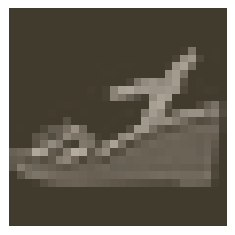

In [3]:
images, labels = next(iter(trainloader))
helper.imshow(images[0,:])

In [6]:
images.shape

torch.Size([64, 1, 28, 28])

### Building the classifier 

In [12]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_layer = nn.Linear(784, 256)
        self.hidden_layer1 = nn.Linear(256, 128)
        self.hidden_layer2 = nn.Linear(128, 64)
        self.output_layer = nn.Linear(64, 10)
        
    def forward(self, x):
        # Flatten the images
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.input_layer(x))
        x = F.relu(self.hidden_layer1(x))
        x = F.relu(self.hidden_layer2(x))
        x = F.log_softmax(self.output_layer(x), dim=1)
        return x

### Train the network

In [13]:
# Instantiate the classifier
model = Classifier()

# define the criteron AKA loss function AKA cost function
criterion = nn.NLLLoss()

# optimzer for updating the weights after calculating the gradients
optimizer = optim.SGD(model.parameters(), lr=0.03)

In [14]:
# Train the network here
epochs = 5

for e in range(epochs):
    current_loss = 0
    for images, labels in trainloader:
        logits = model(images)
        loss = criterion(logits, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        current_loss += loss.item()
    else:
        print(f"Training loss: {current_loss/len(trainloader)}")

Training loss: 0.8277318398200119
Training loss: 0.4700825710508869
Training loss: 0.4147704174237719
Training loss: 0.3803528099060694
Training loss: 0.3568213101007791


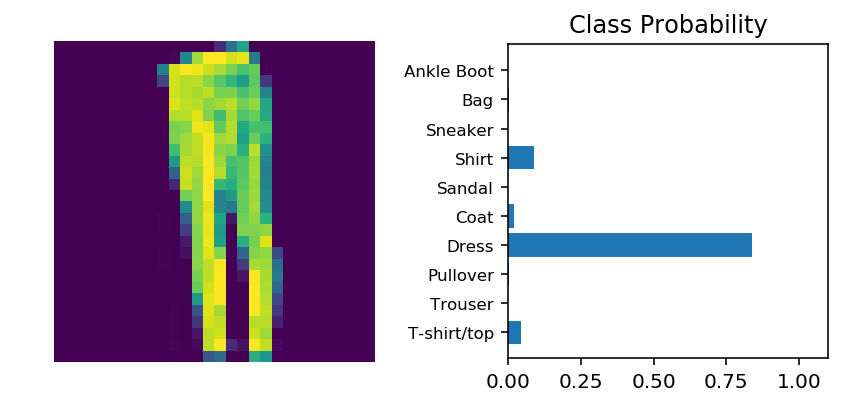

In [26]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')

## Inference and Validation

After training a model as above we are still not yet ready to use it for inference purposes becuase it might be suffering from overfitting. 

We can use validation dataset to check for overfitting and employ strategies such as regularization (drop out) to avoid overfitting

In [33]:
# We can do a forward pass with 1 batch to get the probabilities
images, labels = next(iter(testloader))

# remember our class returns logits, we need to convert it back to probabilities
probabilities = torch.exp(model(images))

# Check the size of the probabilities
probabilities.shape

torch.Size([64, 10])

With the probabilities, we can get the most likely class using the `probabilities.topk` method. This returns the $k$ highest values. Since we just want the most likely class, we can use `probabilities.topk(1)`. This returns a tuple of the top-$k$ values and the top-$k$ indices. If the highest value is the fifth element, we'll get back 4 as the index.

In [34]:
top_p, top_class = probabilities.topk(1, dim=1)
# Look at the most likely classes for the first 10 examples
print(top_class[:10,:])

tensor([[7],
        [7],
        [2],
        [3],
        [5],
        [2],
        [4],
        [3],
        [0],
        [1]])


In [35]:
equals = top_class == labels.view(*top_class.shape)

In [36]:
equals.shape

torch.Size([64, 1])

In [37]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 85.9375%
